Paso 1: Importar las librerías necesarias

In [77]:
# Importar librerías necesarias
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import itertools
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

Paso 2: Cargar y Preprocesar el Dataset malaria

In [78]:
# Cargar el dataset imagenwang directamente desde tensorflow_datasets

(ds_train, ds_test), ds_info = tfds.load('imagenette/full-size-v2',
                                         split=['train', 'validation'],
                                         as_supervised=True,
                                         with_info=True)

# Preprocesamiento de las imágenes
IMG_SIZE = 128  # Redimensionar imágenes a 128x128 píxeles para la CNN

def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = tf.cast(image, tf.float32) / 255.0  # Normalizar
    return image, label

ds_train = ds_train.map(preprocess).batch(32).prefetch(buffer_size=tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocess).batch(32).prefetch(buffer_size=tf.data.AUTOTUNE)


Paso 3: Mostrar algunas imágenes del Dataset

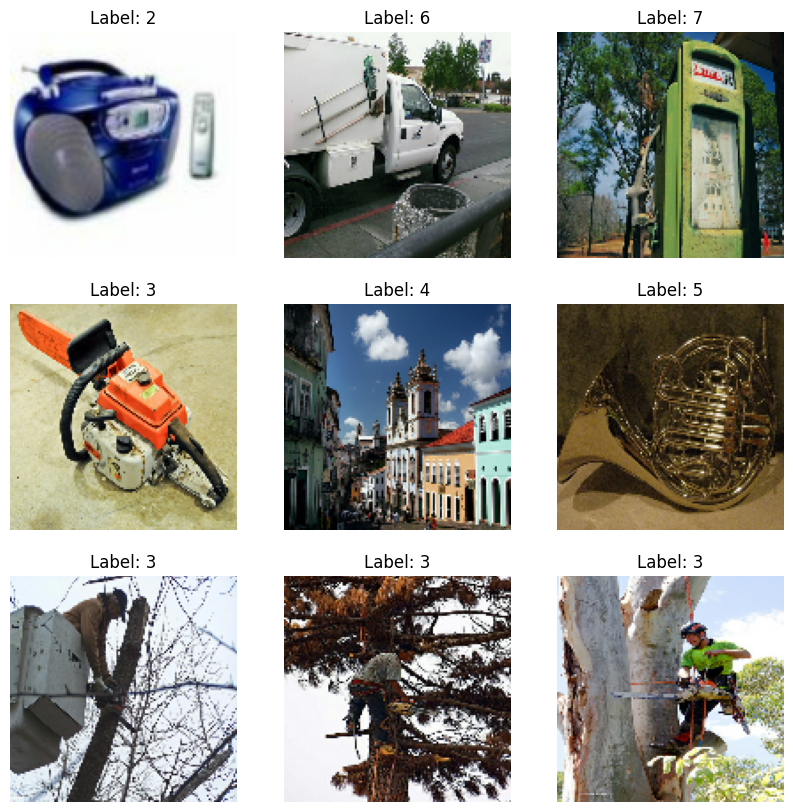

In [79]:
plt.figure(figsize=(10, 10))
for images, labels in ds_train.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(f"Label: {labels[i].numpy()}")
        plt.axis("off")
plt.show()

Paso 4: Crear el Modelo de Red Neuronal Convolucional

In [80]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(ds_info.features['label'].num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [82]:
# Mostrar un resumen del modelo
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,917,792 (37.83 MB)

 Trainable params: 3,305,930 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,611,862 (25.22 MB)

Paso 5: Entrenar el Modelo

In [81]:
history = model.fit(ds_train, validation_data=ds_test, epochs=10)

Epoch 1/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 475s 2s/step - accuracy: 0.3009 - loss: 1.9817 - val_accuracy: 0.5485 - val_loss: 1.3643
Epoch 2/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 389s 1s/step - accuracy: 0.5972 - loss: 1.2084 - val_accuracy: 0.5985 - val_loss: 1.2232
Epoch 3/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 396s 1s/step - accuracy: 0.6836 - loss: 0.9492 - val_accuracy: 0.6201 - val_loss: 1.2161
Epoch 4/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 442s 1s/step - accuracy: 0.7675 - loss: 0.7095 - val_accuracy: 0.6089 - val_loss: 1.3730
Epoch 5/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 392s 1s/step - accuracy: 0.8273 - loss: 0.5341 - val_accuracy: 0.5990 - val_loss: 1.5308
Epoch 6/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 443s 1s/step - accuracy: 0.8901 - loss: 0.3422 - val_accuracy: 0.5921 - val_loss: 1.6164
Epoch 7/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 393s 1s/step - accuracy: 0.9320 - loss: 0.2173 - val_accuracy: 0.5766 - val_loss: 1.9022
Epoch 8/10
296/296 ━━━━━━━━━━━━━━━━━━━━ 437s 1s/step - accuracy: 0.9467 - loss: 0.1686 - val_accu

Paso 6: Guardar el Modelo Entrenado

In [83]:
model.save("cnn_imagenwang_model.keras")

In [84]:
# Load the saved model into the 'loaded_model' variable
loaded_model = keras.models.load_model("cnn_imagenwang_model.keras")

Paso 7: Evaluar el Modelo y Mostrar Métricas

In [85]:
test_loss, test_accuracy = model.evaluate(ds_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Predicciones en el conjunto de prueba
y_true = np.concatenate([y for x, y in ds_test], axis=0)
y_pred = np.argmax(model.predict(ds_test), axis=1)

print(classification_report(y_true, y_pred))

123/123 ━━━━━━━━━━━━━━━━━━━━ 51s 412ms/step - accuracy: 0.5885 - loss: 2.4916
Test Accuracy: 0.59
123/123 ━━━━━━━━━━━━━━━━━━━━ 51s 409ms/step
              precision    recall  f1-score   support

           0       0.66      0.75      0.70       387
           1       0.73      0.57      0.64       395
           2       0.65      0.59      0.62       357
           3       0.40      0.41      0.40       386
           4       0.58      0.66      0.62       409
           5       0.52      0.60      0.56       394
           6       0.51      0.73      0.60       389
           7       0.62      0.51      0.56       419
           8       0.68      0.44      0.53       399
           9       0.72      0.69      0.70       390

    accuracy                           0.59      3925
   macro avg       0.61      0.60      0.59      3925
weighted avg       0.61      0.59      0.59      3925



Paso 8: Graficar la Precisión, la Pérdida y Matriz de Confusión

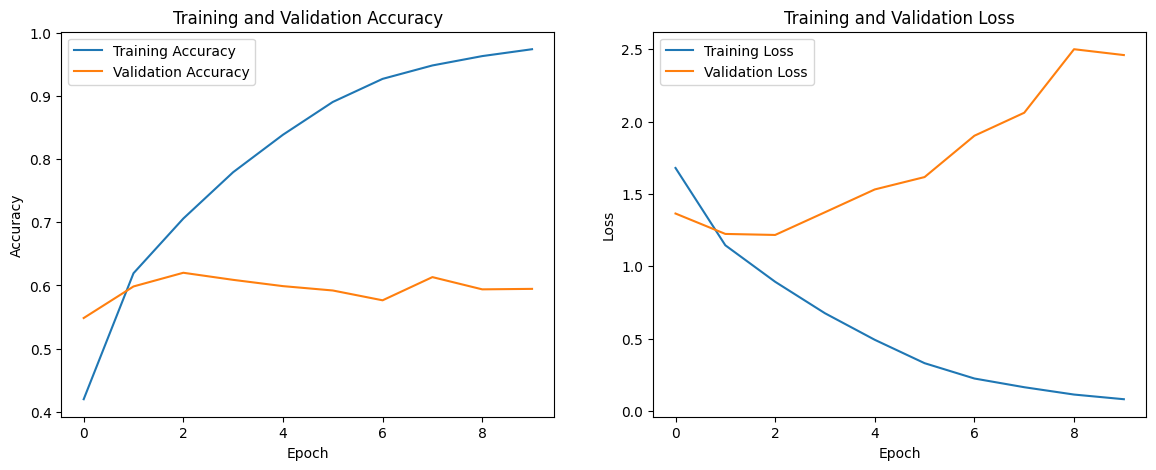

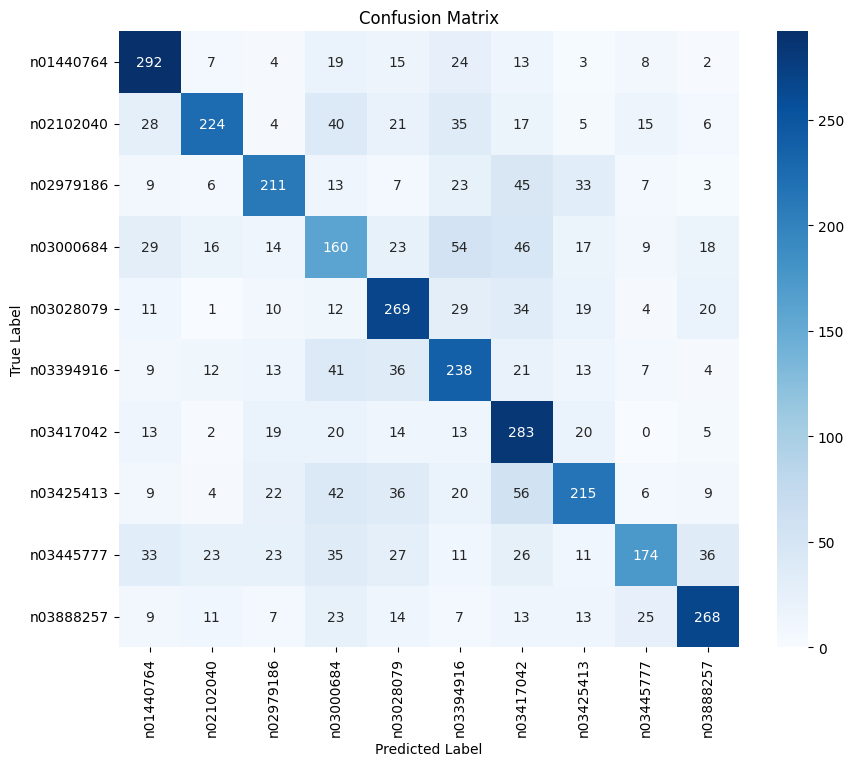

In [86]:
# Gráfica de Precisión y Pérdida
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Matriz de Confusión
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=ds_info.features['label'].names,
            yticklabels=ds_info.features['label'].names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Paso 9: Hacer Predicciones

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted Class: n03394916


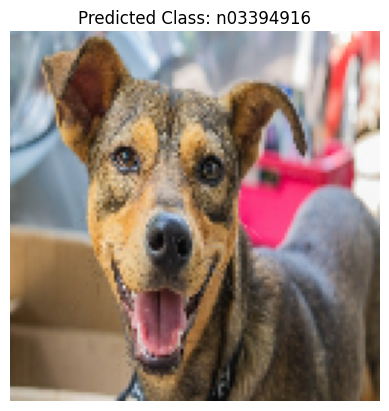

In [88]:
def load_and_preprocess_image(filepath):
    image = tf.image.decode_image(tf.io.read_file(filepath), channels=3)
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = tf.cast(image, tf.float32) / 255.0  # Normalizar
    return image

# Ruta de la imagen
file_path = "/content/dog-5019613_640.jpg"  # Cambia por la ruta de tu imagen
image = load_and_preprocess_image(file_path)
predicted_class = np.argmax(model.predict(tf.expand_dims(image, axis=0)))
print(f"Predicted Class: {ds_info.features['label'].names[predicted_class]}")

# Mostrar la imagen cargada (fuera del rango 0-255)
plt.imshow(np.clip(image, 0, 1))  # Imshow requiere valores entre 0 y 1 para imágenes normalizadas
plt.title(f"Predicted Class: {ds_info.features['label'].names[predicted_class]}")
plt.axis('off')
plt.show()

In [91]:
!jupyter nbconvert --to html "/content/Red_neuronal_convolucional_dataset_malaria_de_tensorflow (1).ipynb"


[NbConvertApp] Converting notebook /content/Red_neuronal_convolucional_dataset_malaria_de_tensorflow (1).ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 4 image(s).
[NbConvertApp] Writing 1989160 bytes to /content/Red_neuronal_convolucional_dataset_malaria_de_tensorflow (1).html
